In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Zomato-data-.csv')

In [4]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
# Befor predicting let's convert the datatype of rate column to float and remove the denominator.

In [6]:
def handelRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

data['rate'] = data['rate'].apply(handelRate)

In [7]:
data.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [9]:
# There is no null value in data

### **Explore List_in(type) Column**

In [10]:
data['listed_in(type)'].describe()

,listed_in(type)
count,148
unique,4
top,Dining
freq,110


In [11]:
data['listed_in(type)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 148 entries, 0 to 147
Series name: listed_in(type)
Non-Null Count  Dtype 
--------------  ----- 
148 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


Text(0.5, 0, 'Type of Resturant')

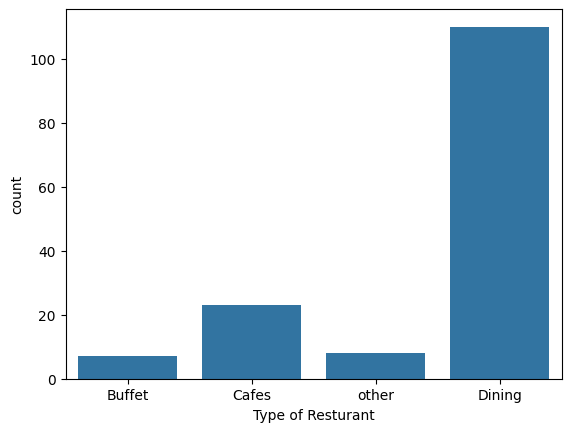

In [12]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel('Type of Resturant')

In [14]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

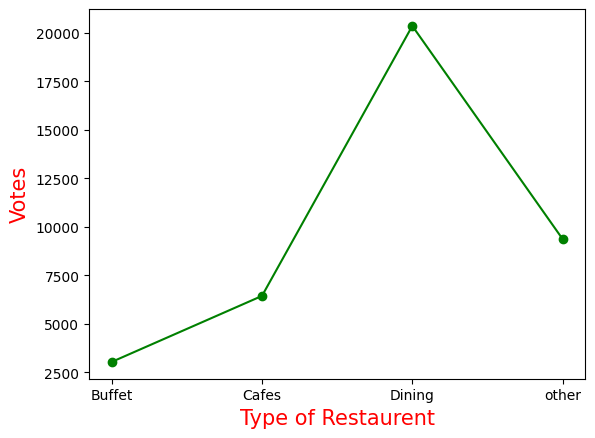

In [18]:
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of Restaurent', c='red', size=15)
plt.ylabel('Votes', c='red', size=15)

In [19]:
# Now we will determine the restaurent name that received the maximum votes based on a given dataframe

In [21]:
max_votes = data['votes'].max()
restaurent_with_max_votes = data.loc[data['votes'] == max_votes, 'name']

print('restaurent(s)_with_maximum_votes:')
print(restaurent_with_max_votes)

restaurent(s)_with_maximum_votes:
38    Empire Restaurant
Name: name, dtype: object


### **Explore Online_order column**

<Axes: xlabel='online_order', ylabel='count'>

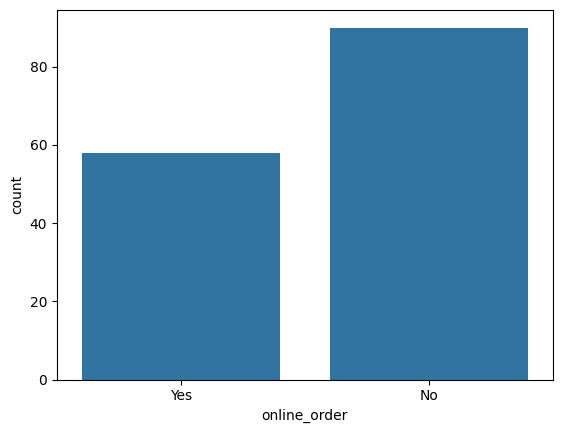

In [22]:
sns.countplot(x=data['online_order'])

In [23]:
# This suggest that majority of restaurent do not accept the online order

### **Explore the Rate column**

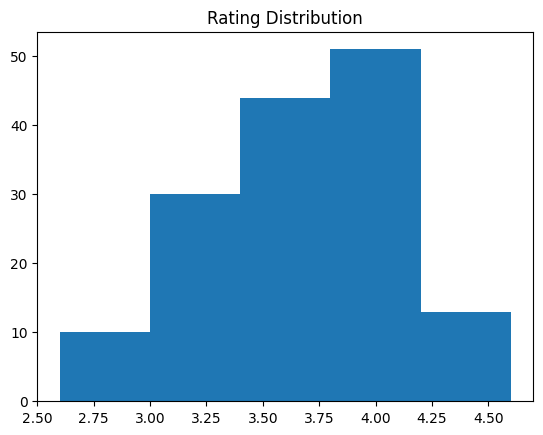

In [24]:
plt.hist(data['rate'], bins=5)
plt.title('Rating Distribution')
plt.show()

### **Explore the Approx(cost)**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

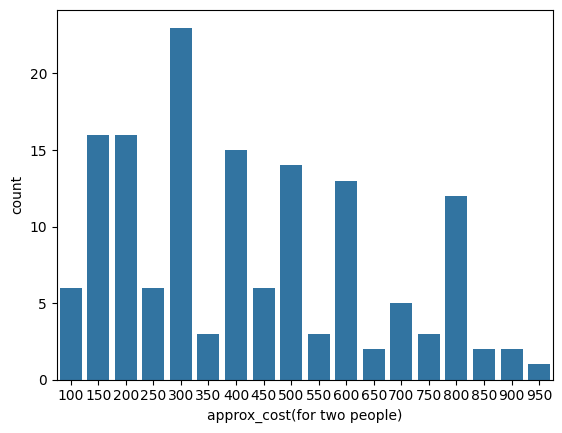

In [25]:
couple_data = data['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [26]:
# Majority of couples prefer restaurent with an approximate cost of rupees 300

In [27]:
# Now we will explore whether online orders recieve higher rating than offline orders

<Axes: xlabel='online_order', ylabel='rate'>

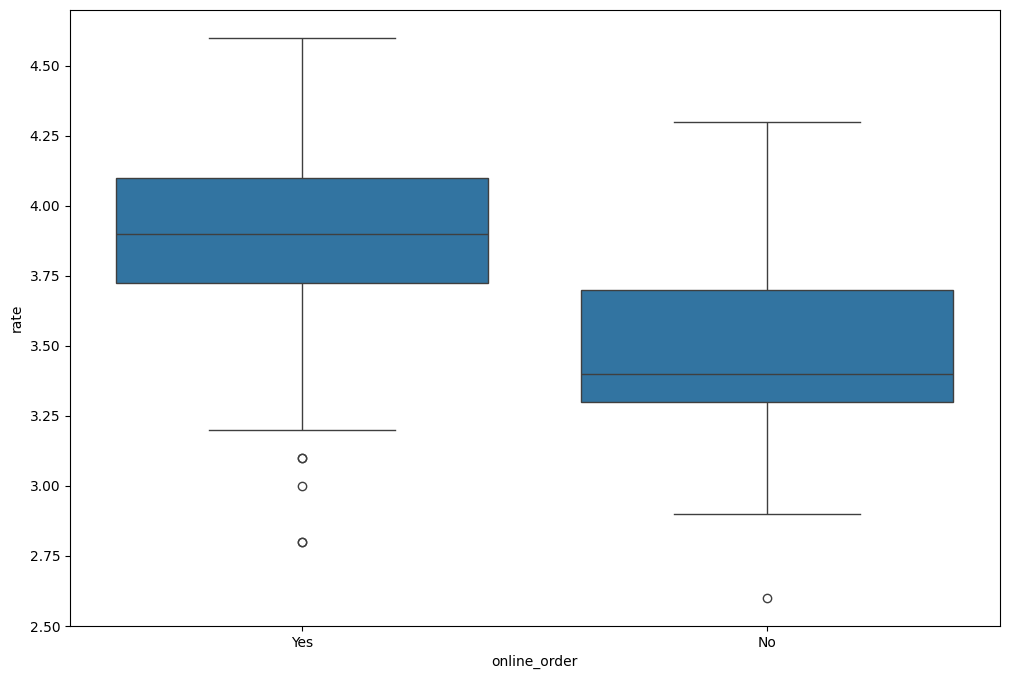

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'online_order', y = 'rate', data = data)

In [30]:
# Offline order received lower rating rather than online order which obtained excellent rating

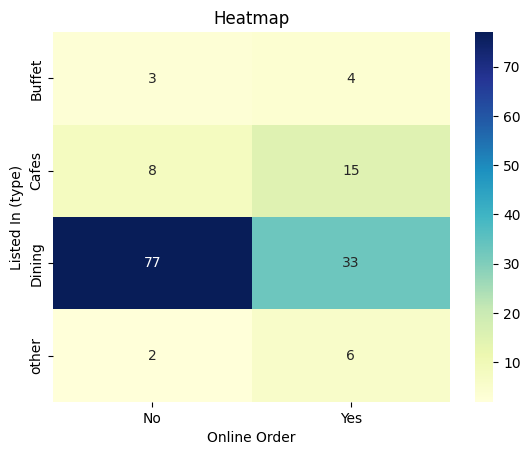

In [33]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (type)')
plt.show()

In [ ]:
# Dining restaurent primarily accept offline orders, where as cafes primarily receive online orders.